Before jumping in, here are a few values that we usually use when evaluating a model:
- Predicted: Outcome of the model on the validation set
- Actual: Values seen in the training set
- Positive (P): Observation is positive 
- Negative (N): Observation is not positive 
- True Positive (TP): Observation is positive, and is predicted correctly
- False Negative (FN): Observation is positive, but predicted wrongly
- True Negative (TN): Observation is negative, and predicted correctly
- False Positive (FP): Observation is negative, but predicted wrongly

## Introduction

In the process of building a machine learning model, model evaluation is an indispensable step to determine the quality of the model. This evaluation not only helps us choose the most suitable model for the specific problem but also provides insight into the effectiveness and capabilities of different models.

The performance of the model is often evaluated based on the test data set. Suppose, the output of the model when the input is the test set is described by vector <code>y_pred</code> - the output prediction vector with each element being the predicted class of a data point in the test set. We need to compare <code>y_pred</code> with the data's true class vector, described by <code>y_true</code>. For example, in the problem there are 3 data classes labeled 0, 1, 2. Suppose there are 10 data points in the test set with the true labels <code>y_true = [0, 0, 0, 0, 1 , 1, 1, 2, 2, 2]</code> and the classifier predicts labels for these points as <code>y_pred = [0, 1, 0, 2, 1, 1, 0, 2, 1, 2]</code>.

To evaluate the model, we need to understand the meaning, nature and application cases of each measure. Common evaluation methods in classification models include: accuracy score, confusion matrix, ROC curve, Area Under the Curve (AUC), Precision and Recall, F1 score, Top R error, etc.

In this section, I will provide you with knowledge to help you master the most basic metrics and know how to apply them to suit each specific data set.

## Confusion Matrix

Also known as an Error Matrix, the Confusion Matrix is a two-dimensional matrix that allows visualization of the algorithm’s performance. While this isn’t an actual metric to use for evaluation, it’s an important starting point.

Predictions are highlighted and divided by class (true/false), before being compared with the actual values. The matrix’s size is compatible with the amount of classes in the label column. In a binary classification, the matrix will be 2X2. If there are 3 classes, the matrix will be 3X3, and so on.

This matrix essentially helps you determine if the classification model is optimized. It shows what errors are being made and helps to determine their exact type. Besides machine learning, the Confusion Matrix is also used in the fields of statistics, data mining, and artificial intelligence. 

In [1]:
import numpy as np

y_true = np.array([0, 0, 0, 0, 1, 1, 1, 2, 2, 2])
y_pred = np.array([0, 1, 0, 2, 1, 1, 0, 2, 1, 2])

In [2]:
def my_confusion_matrix(y_true, y_pred):
    N = np.unique(y_true).shape[0] # number of classes 
    cm = np.zeros((N, N))
    for n in range(y_true.shape[0]):
        cm[y_true[n], y_pred[n]] += 1
    return cm 

cnf_matrix = my_confusion_matrix(y_true, y_pred)
print('Confusion matrix:')
print(cnf_matrix)
print('\nAccuracy:', np.diagonal(cnf_matrix).sum()/cnf_matrix.sum())

Confusion matrix:
[[2. 1. 1.]
 [1. 2. 0.]
 [0. 1. 2.]]

Accuracy: 0.6


Same on sklearn library:

In [3]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_true, y_pred)
print('Confusion matrix:')
print(cnf_matrix)

Confusion matrix:
[[2 1 1]
 [1 2 0]
 [0 1 2]]


The above representation of the confusion matrix is ​​also known as the unnormalized confusion matrix, which means the confusion matrix has not been standardized. To have a clearer view, we can use normalized confusion matrix, which means normalized confusion matrix. To get the normalized confusion matrix, we take each row of the unnormalized confusion matrix and divide it by the sum of the elements in that row. Thus, we can observe that the sum of the elements in a row of the normalized confusion matrix is ​​always equal to 1. This is usually not true in each column. Here is how to calculate the normalized confusion matrix:

In [4]:
normalized_confusion_matrix = cnf_matrix/cnf_matrix.sum(axis = 1, keepdims = True)
print('\nConfusion matrix (with normalizatrion:)')
print(normalized_confusion_matrix)


Confusion matrix (with normalizatrion:)
[[0.5        0.25       0.25      ]
 [0.33333333 0.66666667 0.        ]
 [0.         0.33333333 0.66666667]]


Confusion matrices are often illustrated in color for a clearer view. The code below helps display the confusion matrix in both forms

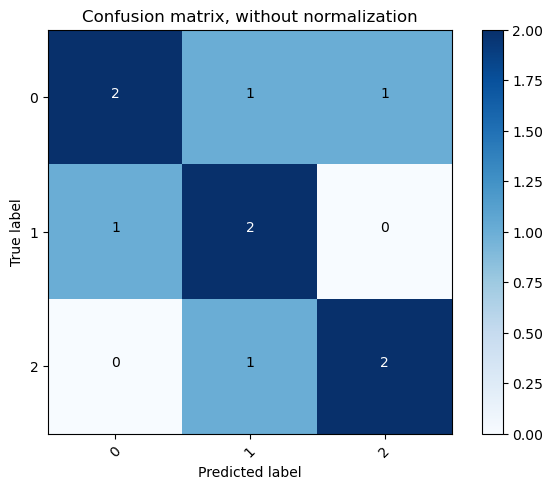

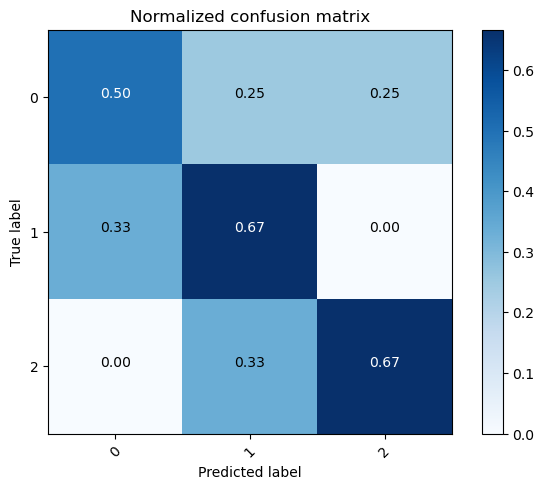

In [5]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
class_names = [0, 1, 2]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

For problems with many data layers, this color representation is very useful. Dark cells represent high values. A good model will give a confusion matrix with the elements on the main diagonal having large values, the remaining elements having small values. In other words, when representing in color, the darker the diagonal color compared to the rest, the better. From the two figures above, we can see that the standardized confusion matrix carries more information. The difference is seen in the top left box. Data layer 0 is not classified very well, but in the unnormalized confusion matrix, it is still as dark as the other two cells on the main diagonal.

## Accuracy Score

A classification model's accuracy is defined as the percentage of predictions it got right. However, it's important to understand that it becomes less reliable when the probability of one outcome is significantly higher than the other one, making it less ideal as a stand-alone metric.

The expression used to calculate accuracy is as follows:

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

In the example, we can count 6 data points correctly predicted out of 10 total. So we conclude that the model's accuracy is 0.6 (or 60%). Note that this is a problem with only 3 classes, so the minimum accuracy is about 1/3, when all points are predicted to belong to a certain class.

In [6]:
def acc(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    return float(correct)/y_true.shape[0]

print('accuracy = ', acc(y_true, y_pred))

accuracy =  0.6


In [7]:
from sklearn.metrics import accuracy_score
print('accuracy = ',accuracy_score(y_true, y_pred))

accuracy =  0.6


## True/False Positive/Negative

This evaluation method is often applied to classification problems with two data layers. More specifically, among these two data classes, there is one class that is more serious than the other and needs to be predicted accurately. For example, in the problem of determining whether there is cancer or not, not missing is more important than misdiagnosing a negative as a positive. In the problem of determining whether there are underground mines or not, omission is much more serious than false alarm. Or in the problem of filtering junk email, mistakenly putting important emails in the trash is more serious than identifying a junk email as a regular email.

In these problems, people often define the more important data class that needs to be correctly identified as the *Positive* class (P), the remaining class is called *Negative* (N). We define *True Positive* (TP), *False Positive* (FP), *True Negative* (TN), *False Negative* (FN) based on the unstandardized confusion matrix as follows:

```bash
                  |      Predicted      |      Predicted      |
                  |     as Positive     |     as Negative     |
------------------|---------------------|---------------------|
 Actual: Positive | True Positive (TP)  | False Negative (FN) |
------------------|---------------------|---------------------|
 Actual: Negative | False Positive (FP) | True Negative (TN)  |
------------------|---------------------|---------------------|
```

People are often interested in TPR, FNR, FPR, TNR (R - Rate) based on *normalized confusion matrix* as follows:

```bash
                  |     Predicted      |     Predicted      |
                  |    as Positive     |    as Negative     |
------------------|--------------------|--------------------|
 Actual: Positive | TPR = TP/(TP + FN) | FNR = FN/(TP + FN) |
------------------|--------------------|--------------------|
 Actual: Negative | FPR = FP/(FP + TN) | TNR = TN/(FP + TN) |
------------------|--------------------|--------------------|
```

False Positive Rate is also known as *False Alarm Rate*, False Negative Rate is also known as *Miss Detection Rate*. In the problem of mine detection, it is better to make a false alarm than to miss it, which means we can accept a high *False Alarm Rate* to achieve a low *Miss Detection Rate*.

Attention:
- Knowing one column of this confusion matrix will infer the other column because the sum of the rows is always equal to 1 and there are only two data layers.

- **For problems with many data layers**, we can build a True/False Positive/Negative table for **each layer** if we consider that layer to be the *Positive* layer, the remaining layers are combined into the *Negative* layer, like the way in one- vs-rest method.

## Receiver Operating Characteristic curve (ROC curve)

In some problems, increasing or decreasing FNR and FPR can be done by changing a certain *threshold*. For example, when we use the Logistic Regression algorithm, the output of the model can be hard classes 0 or 1, or it can also be values ​​representing the probability that the input data belongs to class 1. When Using the sklearn Logistic Regression library, we can get these probability values ​​using the <code>predict_proba()</code> method. By default, the threshold used is 0.5, meaning a data point x will be predicted to fall into class 1 if the <code>predict_proba(x)</code> value is greater than 0.5 and vice versa.

If we now consider layer 1 as the Positive layer, layer 0 as the Negative layer, the question is how to increase the *false positive rate* (FPR) to reduce the *false positive rate* (FNR)? Note that increasing FNR means decreasing TPR because their sum is always equal to 1.

A simple technique is to change the threshold value from 0.5 to a smaller number. For example, if you choose threshold = 0.3, then any predicted point with an output probability greater than 0.3 will be predicted to belong to the *Positive* class. In other words, the proportion of points classified as *Positive* will increase, causing both the *False Positive Rate* and *True Positive Rate* to increase (the first column in the matrix increases). From this, it can be deduced that both FNR and TNR are reduced.

On the contrary, if we want to miss rather than misreport, of course to some extent, like the problem of identifying spam emails, for example, we need to increase the threshold to a number larger than 0.5. Then, most data points will be predicted to be in class 0, which means *Negative*, and both TNF and FNR **increase**, meaning TPR and FPR **decrease**.

Thus, for each value of threshold, we will obtain a pair (FPR, TPR). Representing the points (FPR, TPR) on the graph when changing the threshold from 0 to 1, we will obtain a line called *Receiver Operating Characteristic curve* or ***ROC curve***. (Note that the value range of the threshold is not necessarily from 0 to 1 in general problems. This value range needs to be guaranteed to have cases where TPR/FPR takes on the maximum or minimum value that it can achieve. Okay).

Below is an example with two data layers. The first layer is the Negative layer with 20 data points, the remaining 30 points belong to the Positive layer. Suppose the model is considering data outputs (probabilities) stored in the <code>scores</code> variable.

In [8]:
n0, n1 = 20, 30
score0 = np.random.rand(n0)/2
label0 = np.zeros(n0, dtype = int)
score1  = np.random.rand(n1)/2 + .2
label1 = np.ones(n1, dtype = int)
scores = np.concatenate((score0, score1))
y_true = np.concatenate((label0, label1))

print('True labels:')
print(y_true)
print('\nScores:')
print(scores)

True labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]

Scores:
[0.42571478 0.30724836 0.18235665 0.23385999 0.26406298 0.17179767
 0.14222291 0.34326396 0.18909977 0.32926174 0.13122415 0.42047143
 0.03182977 0.10392497 0.32739953 0.38080442 0.18537114 0.13398456
 0.47563596 0.08391816 0.49025892 0.64971255 0.65146378 0.66776418
 0.36978394 0.68081546 0.43323607 0.62047527 0.45089242 0.58005267
 0.28683206 0.66104575 0.21781934 0.53885699 0.6884603  0.57315791
 0.60465889 0.43336382 0.51629348 0.58151161 0.62990257 0.43048037
 0.66508717 0.51578653 0.42918563 0.26016014 0.68486011 0.47355728
 0.31696232 0.64709806]


In general, grade 1 scores have higher scores. The sklearn library will help us calculate thresholds as well as the corresponding FPR and TPR:

In [9]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_true, scores, pos_label = 1)
print('Thresholds:')
print(thresholds)

Thresholds:
[1.6884603  0.6884603  0.49025892 0.47563596 0.42918563 0.38080442
 0.36978394 0.32739953 0.31696232 0.30724836 0.28683206 0.26406298
 0.26016014 0.23385999 0.21781934 0.03182977]


In [10]:
print('False Positive Rate:')
print(fpr)

False Positive Rate:
[0.   0.   0.   0.05 0.05 0.2  0.2  0.35 0.35 0.4  0.4  0.45 0.45 0.5
 0.5  1.  ]


In [11]:
print('True Positive Rate:')
tpr

True Positive Rate:


array([0.        , 0.03333333, 0.63333333, 0.63333333, 0.83333333,
       0.83333333, 0.86666667, 0.86666667, 0.9       , 0.9       ,
       0.93333333, 0.93333333, 0.96666667, 0.96666667, 1.        ,
       1.        ])

Thus, corresponding to threshold = 1.67084519, fpr = 0 and tpr = 0. This is not a good threshold because although the False Positive Rate is low, the True Positive Rate is also very low. We always want low FPR and high TPR.

The ROC for this problem is illustrated below:

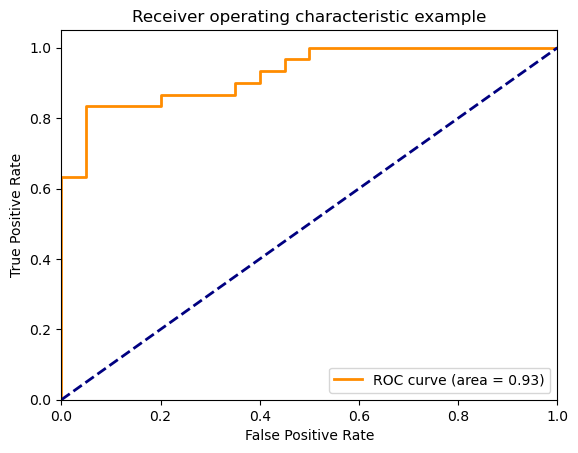

In [12]:
import matplotlib.pyplot as plt
from itertools import cycle
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Area Under the Curve (AUC)

Based on the ROC curve, we can show whether a model is effective or not. An effective model has a low FPR and high TPR, which means there exists a point on the ROC curve close to the point with coordinates (0, 1) on the graph (upper left corner). The closer the curve is, the more effective the model is.

There is another parameter for evaluation that I used above called Area Under the Curve or AUC. This quantity is the area under the orange ROC curve. This value is a positive number less than or equal to 1. The larger this value, the better the model.

Note: Cross validation can also be performed by specifying the ROC curve and AUC on [validation set].

## Precision and Recall

For classification problems where the data sets of the classes are very different, there is a commonly used allowed effect called Precision-Recall.

First, calculate the binary classification. We also consider one of the two layers to be positive, the other layer to be negative.

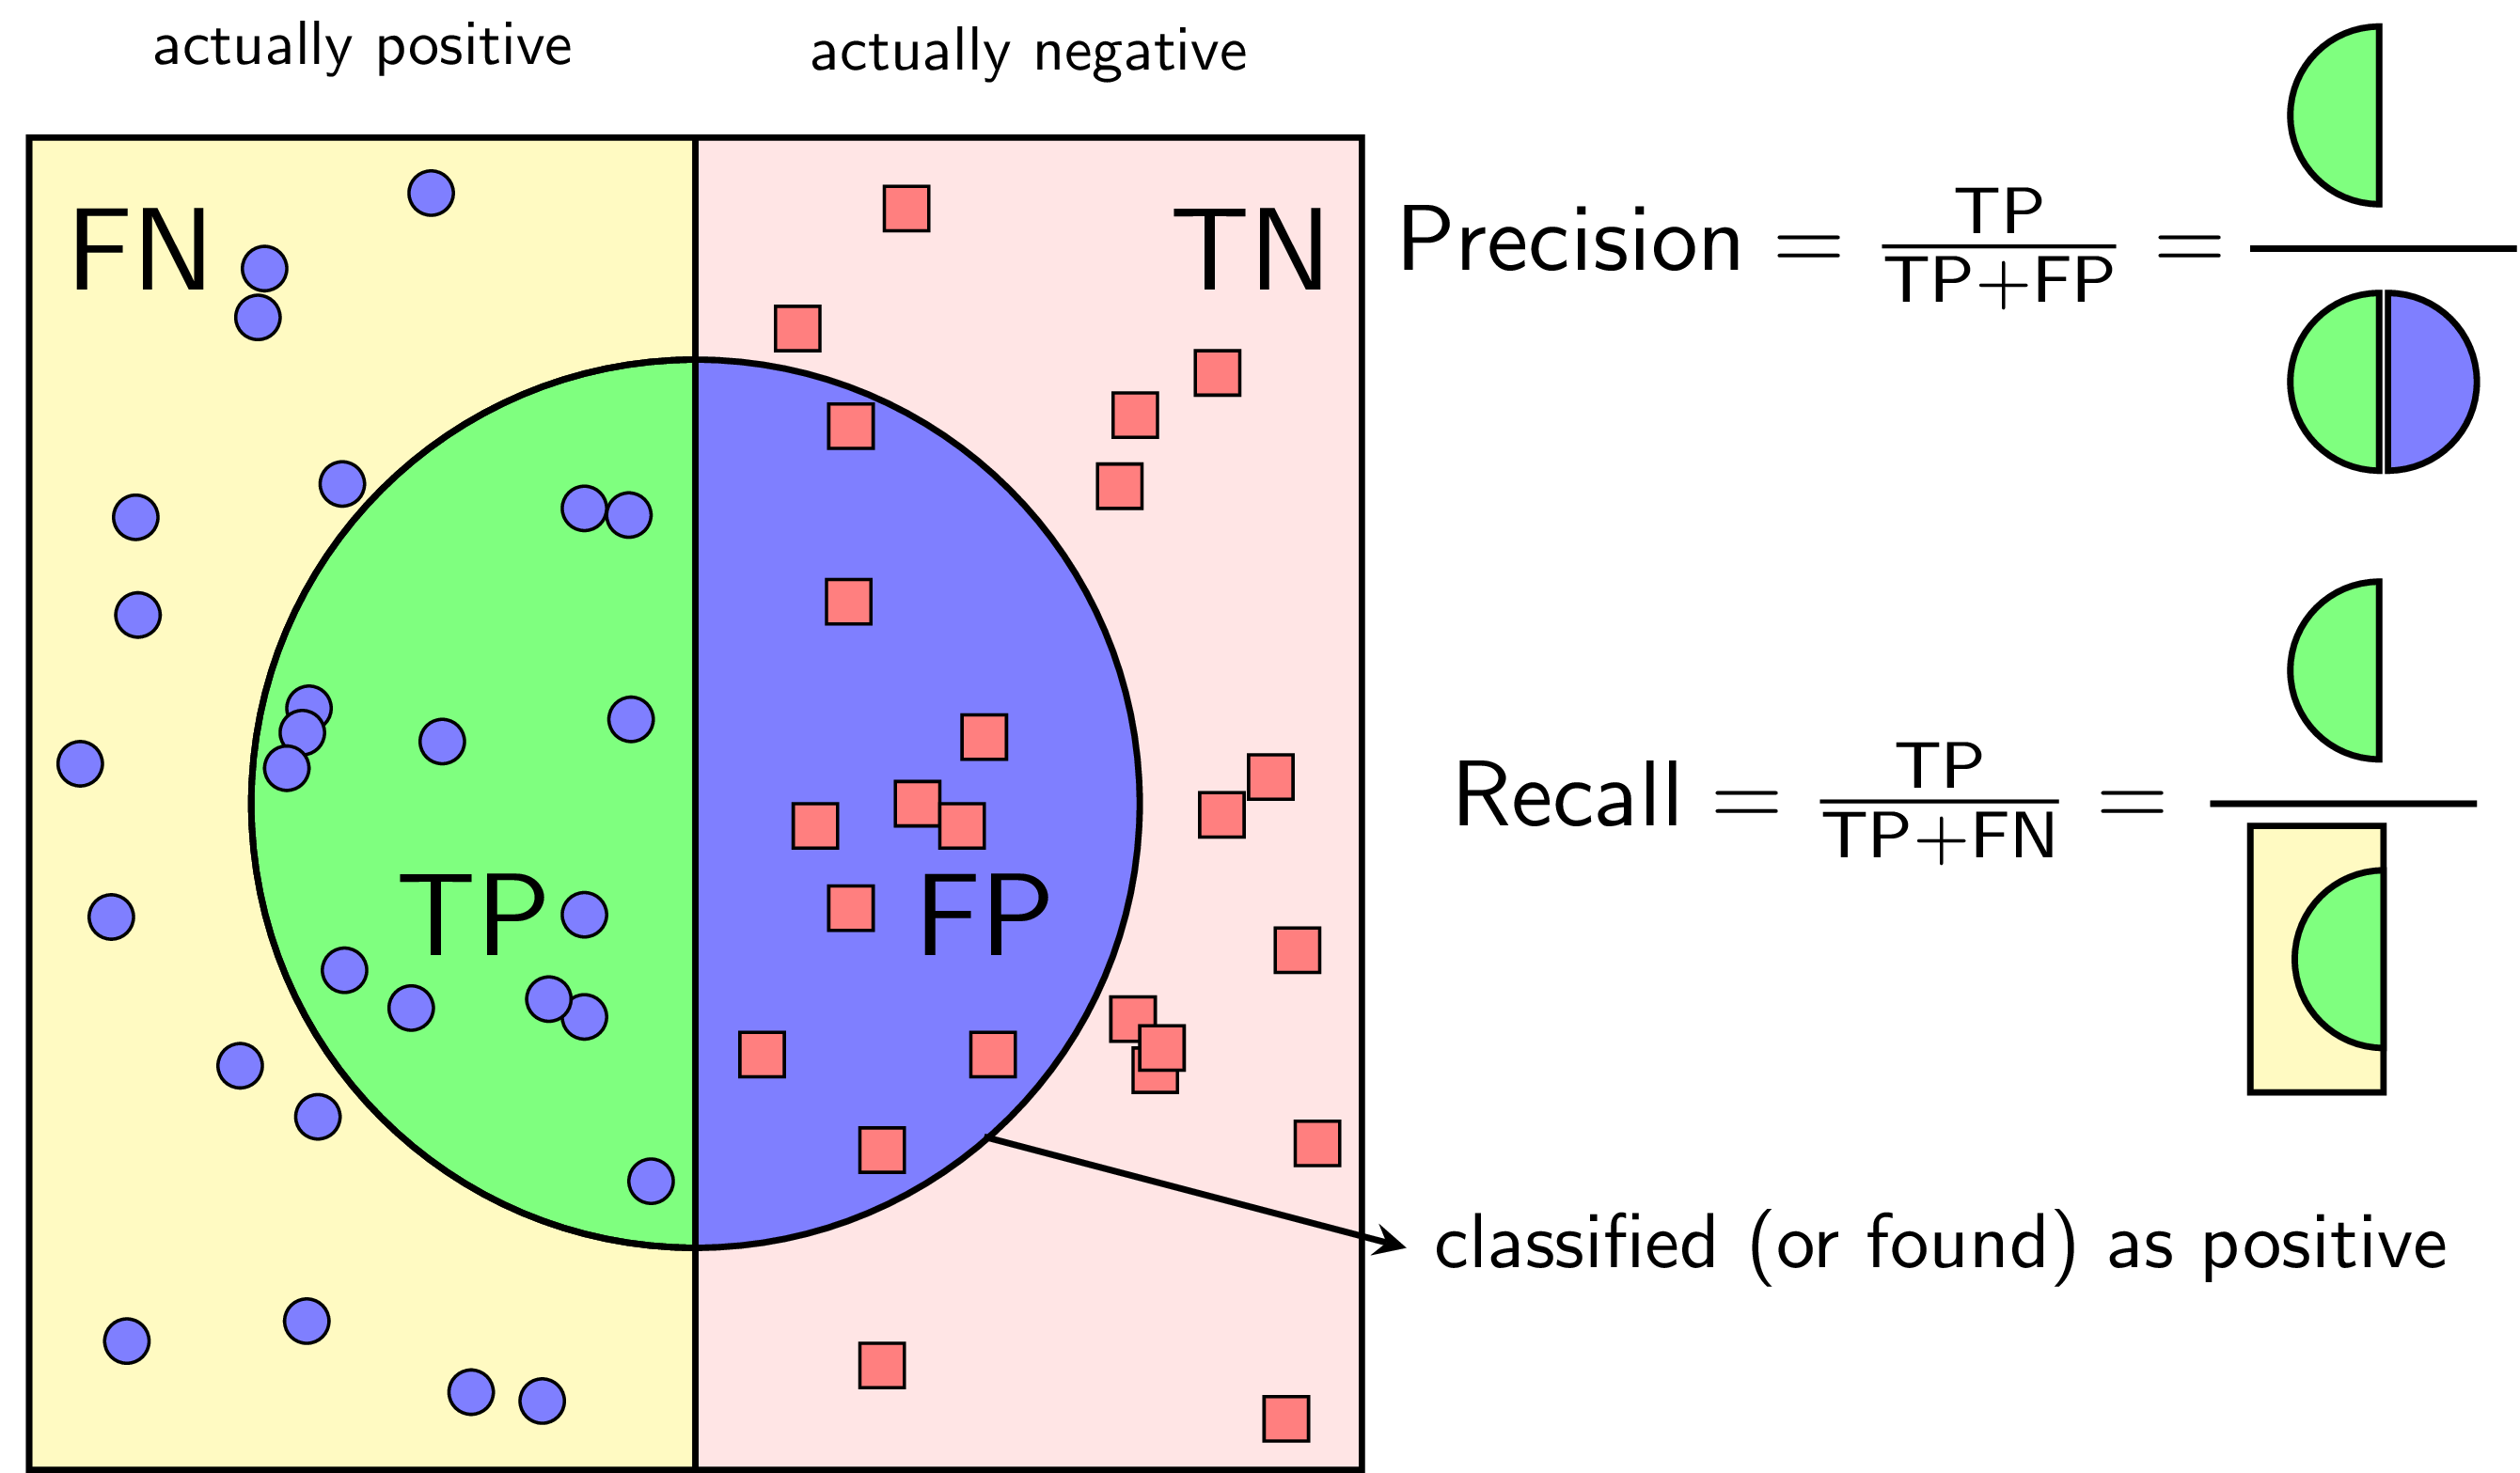

For one way of defining a class as positive, ***Precision*** is defined as the ratio of true positive points among those classified as positive (TP + FP).

***Recall*** is defined as the ratio of true positive points among those that are actually positive (TP + FN).

Mathematically, Precison and Recall are two fractions with equal numerators but different denominators:

$$Precision = \frac{TP}{TP + FP}$$

$$Recall = \frac{TP}{TP + FN}$$

Readers may notice that TPR and Recall are two equal quantities. Additionally, both Precision and Recall are non-negative numbers less than or equal to one.

High Precision means the accuracy of the found points is high. High recall means high True Positive Rate, which means the rate of missing truly positive points is low.

In [13]:
# confusion matrix to precision + recall
def cm2pr_binary(cm):
    p = cm[0,0]/np.sum(cm[:,0])
    r = cm[0,0]/np.sum(cm[0])
    return (p, r)

# example of a confusion matrix for binary classification problem 
cm = np.array([[100., 10], [20, 70]])
p,r = cm2pr_binary(cm)
print("precition = {0:.2f}, recall = {1:.2f}".format(p, r))

precition = 0.83, recall = 0.91


When Precision = 1, all found points are truly positive, meaning there are no negative points mixed into the results. However, Precision = 1 does not guarantee that the model is good, because the question is whether the model has found all positive points or not. If a model can only find exactly one positive point that is most certain, then we cannot call it a good model.

When Recall = 1, all positive points are found. However, this quantity does not measure how many negative points are mixed in there. If the model classifies every point as positive, then Recall = 1 is certain, but it is easy to see that this is an extremely bad model.

A good classification model is one that has both Precision and Recall high, meaning the closer to one, the better. There are two ways to measure the quality of a classifier based on Precision and Reall: Precision-Recall curve and F-score.

### Precision-Recall curve và Average precision

Similar to ROC curve, we can also evaluate the model based on changing a threshold and observing the values ​​of Precision and Recall. The concept of Area Under the Curve (AUC) is also defined similarly. With Precision-Recall Curve, AUC also has another name, ***Average precision (AP)***.

Suppose there are $\mathcal{N}$ thresholds to calculate precision and recall, with each threshold giving a pair of precision and recall values ​​of N. $\mathbf{P_n, R_n}$, $n = 1, 2, ..., \mathcal{N}$. Precision-Recall curve is drawn by drawing each point with $\mathbf{P_n, R_n}$ coordinate on the coordinate axis and connecting them together. AP is determined by:

$$AP = \sum_{n=1}^{\mathcal{N}-1} (R_{n} - R_{n-1})P_n$$

Where $(R_{n} - R_{n-1})P_n$ is the area of ​​the rectangle with width $(R_{n} - R_{n-1})$ and height $P_n$. The sum of the areas of all rectangles is the AP. This is also close to calculating integrals based on calculating the area of ​​each small rectangle.

More detail at <a href="http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html">Precision-Recall–scikit-learn</a>

### F1 score

F1 score, which is the harmonic mean of precision and recall (assuming that these two quantities are non-zero):

$$\frac{2}{F1} = \frac{1}{Precision} + \frac{1}{Recall} \text{or} F1 = 2 \times \frac{1}{\frac{1}{Precision} + \frac{1}{Recall}} = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$

F1 score has a value within half of the interval $(0, 1]$. The higher F1, the better the classifier. When both recall and precision are equal to 1 (best possible).

<table>
    <tr>
        <td>Recall</td>
        <td>Precision</td>
        <td>F1</td>
        <td>Interpretation</td>
    </tr>
    <tr>
        <td>1</td>
        <td>1</td>
        <td>1</td>
        <td>Perfect</td>
    </tr>
    <tr>
        <td>0.1</td>
        <td>0.1</td>
        <td>0.1</td>
        <td>Worst</td>
    </tr>
    <tr>
        <td>0.5</td>
        <td>0.5</td>
        <td>0.50</td>
        <td>Medium</td>
    </tr>
    <tr>
        <td>0.3</td>
        <td>0.8</td>
        <td>0.36</td>
        <td>Not good</td>
    </tr>
    <tr>
        <td>1</td>
        <td>0.1</td>
        <td>0.182</td>
        <td>Not good</td>
    </tr>
</table>

Thus, a classifier with precision = recall = 0.5 is better than another classifier with precision = 0.3, recall = 0.8 according to this measure.

General case of F1 score is $F_{\beta}$ score, where $\beta$ is a positive number. The formula is as follows:

$$F_{\beta} = (1 + \beta^2) \times \frac{Precision \times Recall}{\beta^2 \times Precision + Recall}$$

When $\beta = 1$, we have the F1 score. When $\beta = 0.5$, we have the F0.5 score. When $\beta = 2$, we have the F2 score. The higher the $\beta$, the more emphasis is placed on Recall. The lower the $\beta$, the more emphasis is placed on Precision.

### Precision-recall for multi-class classification problem

Like the ROC curve, the precision-recall curve was originally defined for the binary classification problem. To be able to apply these measurements to the multi-class classification problem, the output quantities (ground truth and predicted output) need to be converted to binary form.

Intuitively, we can reduce the multi-class classification problem to a binary classification problem by considering each class. For each class, we consider the data belonging to that class to have the label positive, all remaining data to have the label negative. Then, Precision, Recall, and PR curve values ​​are applied to each layer. For each class, we will receive a pair of precision and recall values. For problems with few data layers, we can illustrate the PR curve for each layer on the same graph. However, for problems with many data layers, this is sometimes not feasible. Instead, two Precision-Recall based evaluations are used: *micro-average* and *macro-average*.

#### Micro-average

Example problem with 3 data layers, the classifier for the parameters FP, TP, FN of each layer is:

In [14]:
tp1, fp1, fn1 = 10, 5, 3
tp2, fp2, fn2 = 17, 7, 10
tp3, fp3, fn3 = 25, 2, 4

In [16]:
def PR(tp, fp, fn):
    P = float(tp)/(tp + fp)
    R = float(tp)/(tp + fn)
    return (P, R)

(P1, R1) = PR(tp1, fp1, fn1)
(P2, R2) = PR(tp2, fp2, fn2)
(P3, R3) = PR(tp3, fp3, fn2)

print('(P1, R1) = (%.2f, %.2f)'%(P1, R1))
print('(P2, R2) = (%.2f, %.2f)'%(P2, R2))
print('(P3, R3) = (%.2f, %.2f)'%(P3, R3))

(P1, R1) = (0.67, 0.77)
(P2, R2) = (0.71, 0.63)
(P3, R3) = (0.93, 0.71)


Micro-average precision and Micro-average recall are simply calculated by:

$$ \text{Micro-average precision} = \frac{\sum_{i=1}^{n} TP_i}{\sum_{i=1}^{n} TP_i + \sum_{i=1}^{n} FP_i}$$

$$ \text{Micro-average recall} = \frac{\sum_{i=1}^{n} TP_i}{\sum_{i=1}^{n} TP_i + \sum_{i=1}^{n} FN_i}$$

With:
- $TP_i, FP_i, FN_i$ are the number of True Positive, False Positive, False Negative of layer i.

That is, TP is calculated as the sum of all TP of each class. Same with FP and FN. With the above example, the micro-average precision and recall are calculated as:

In [17]:
total_tp = tp1 + tp2 + tp3
total_fp = fp1 + fp2 + fp3 
total_fn = fn1 + fn2 + fn3 
micro_ap = float(total_tp)/(total_tp + total_fp)
micro_ar = float(total_tp)/(total_tp + total_fn)
print('(micro_ap, micro_ar) = (%.2f, %.2f)' % (micro_ap, micro_ar))

(micro_ap, micro_ar) = (0.79, 0.75)


Micro-average F-Score cũng được tính tương tự như F-score nhưng dựa trên micro-average precision và micro-average recall.